<a href="https://colab.research.google.com/github/mohamed97-ba/Spot-the-Mask-Challenge_zindi/blob/master/Spot_the_Mask_Challenge_zindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

!unzip '/content/drive/My Drive/Copie de images.zip'



Archive:  /content/drive/My Drive/Copie de images.zip
   creating: images/
  inflating: images/wiovvusmzmxindaealykgesxwwleql.jpg  
  inflating: images/uxykipqshvpliunxlldynrpskpdzeu.png  
  inflating: images/kpcznzbgvgwliaqhkcrwsusssykqvs.jpg  
  inflating: images/nlhevzkzseaudpnhbawmmufkxnqyni.jpg  
  inflating: images/xssuquzxphcmdrpcrurcedzxwazbmm.jpg  
  inflating: images/stjfpwlmjugoohoeqvaoebagvubysc.jpg  
  inflating: images/louklilbbrpqodurfzvvejxglgocwi.jpg  
  inflating: images/bpwzubqeojttiklnrskmqheackknsn.jpg  
  inflating: images/laaqrylcpzmanpcdilwteiuhetchzt.jpg  
  inflating: images/ljkyoarjjsfzpguocnnmteqqidnztx.jpg  
  inflating: images/itxiomwebnkfodztausaduxyrhgfrv.jpg  
  inflating: images/xqjultlkywteeyuuxvtcfmrwqatbkd.jpg  
  inflating: images/wpyvgvjhybaljtzduconhborbnpcps.jpg  
  inflating: images/rblxyebdxsswuozyyjmdcyuyqjmzcz.jpg  
  inflating: images/sczhdwamqbmpolozkmncxyqtcwcbdd.jpg  
  inflating: images/uzewooxjwzphkroseskteuzyuzjgrr.jpg  
  inflating: 

In [0]:
import pandas as pd

train = pd.read_csv('/content/train_labels.csv')
sub = pd.read_csv('/content/sample_sub_v2.csv')

In [0]:
import glob
l = list(train['image'])
h = glob.glob("/content/images/*.*")

In [0]:
!mkdir hidata
import os
import shutil 
for i in l:
  h = "/content/images/"+i
  d = "/content/hidata/"+i
  shutil.move(h, d)

In [0]:
import glob
r = glob.glob("/content/hidata/*.*")
h = glob.glob("/content/images/*.*")
len(r),len(h)



(1308, 509)

In [0]:
import numpy as np
import pandas as pd


from fastai.vision import *
from pathlib import Path
import matplotlib.pyplot as plt

In [0]:
!pip install -q efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

In [0]:
print('Make sure cuda is installed:', torch.cuda.is_available())
print('Make sure cudnn is enabled:', torch.backends.cudnn.enabled)
tfms=get_transforms(do_flip=True,flip_vert=True,max_lighting=0.3,max_zoom=1.8,max_warp=0.2,max_rotate=45)

Make sure cuda is installed: True
Make sure cudnn is enabled: True


In [0]:
def get_data(bs, size):
    data = ImageDataBunch.from_folder('/content/', train="hidata/", test='images/', bs=bs, size=size, valid_pct=0.20, 
                                  resize_method=ResizeMethod.SQUISH, 
                                  ds_tfms=tfms,num_workers=4).normalize(imagenet_stats)
    return data

In [0]:
data = get_data(bs=32,size=224)

In [0]:
data.c

14

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[ accuracy])




In [0]:
# model_name = 'efficientnet-b0'

In [0]:
#def get_model(pretrained=True, **kwargs):
    model = EfficientNet.from_pretrained(model_name)
    model._fc = nn.Linear(model._fc.in_features, data.c)
    return model

In [0]:
learn = Learner(data, get_model(), 
                metrics=[accuracy]).mixup()

NameError: ignored

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


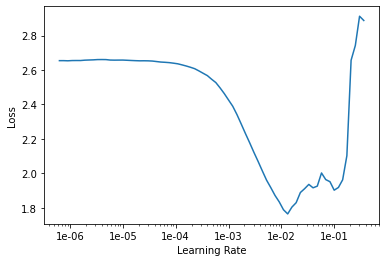

In [0]:
learn.lr_find()
learn.recorder.plot()



In [0]:
learn.fit_one_cycle(10,slice(0.001))

epoch,train_loss,valid_loss,accuracy,time
0,3.665296,2.685886,0.370107,00:42
1,2.590941,0.963441,0.793594,00:33
2,1.964031,0.650927,0.871886,00:33
3,1.553028,0.216655,0.967972,00:34
4,1.022365,0.149073,0.975089,00:34
5,0.718754,0.120155,0.978648,00:33
6,0.564039,0.091036,0.982206,00:33
7,0.478946,0.079005,0.975089,00:33
8,0.459183,0.082550,0.975089,00:32
9,0.410709,0.058458,0.978648,00:33


In [0]:
learn.unfreeze()
learn.fit_one_cycle(5,1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.245011,0.128648,0.971530,00:34
1,0.229257,0.132562,0.971530,00:34
2,0.338591,0.152901,0.967972,00:33
3,0.374238,0.139563,0.967972,00:34
4,0.349694,0.154469,0.971530,00:33


In [0]:
preds_test,y_test = learn.TTA(ds_type=DatasetType.Test)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()



True

In [0]:
sub=pd.read_csv('/content/sample_sub_v2.csv')


In [0]:
import os
submission = pd.DataFrame({'id': sub['image'], 'label': preds_test[:,1]})


In [0]:
submission.to_csv('zindihack67.csv', index = False)

In [0]:
submission.head()

,id,label
0,aadawlxbmapqrblgxyzarhjasgiobu.png,0.000345
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg,0.000379
2,aclkjfvackiieiznzfcwienplielrj.jpg,0.000935
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg,0.002030
4,aelzzshpfxerelefnkatpczktuxjln.jpg,0.000113
